### Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

#### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [133]:
data = pd.read_excel('Election_Data.xlsx',sheet_name = 'Election_Dataset_Two Classes',engine='openpyxl')

In [134]:
data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [135]:
data.shape

(1525, 10)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [137]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [138]:
data.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [139]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [140]:
data = data.rename(columns={'economic.cond.national':"economic_cond_national",'economic.cond.household':"economic_cond_household",'political.knowledge':"political_knowledge"})

In [141]:
data.isnull().sum()

vote                       0
age                        0
economic_cond_national     0
economic_cond_household    0
Blair                      0
Hague                      0
Europe                     0
political_knowledge        0
gender                     0
dtype: int64

In [142]:
data.duplicated().sum() 

8

In [143]:
data.skew()

age                        0.144621
economic_cond_national    -0.240453
economic_cond_household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political_knowledge       -0.426838
dtype: float64

#### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

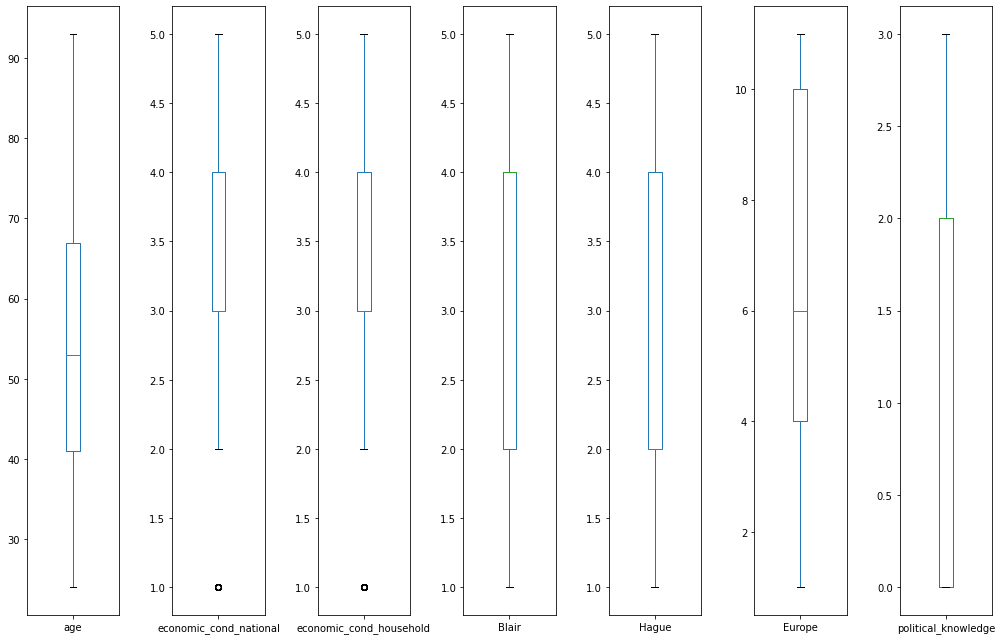

In [144]:
data.plot(kind='box',subplots= True,figsize=(14,9));
plt.tight_layout();

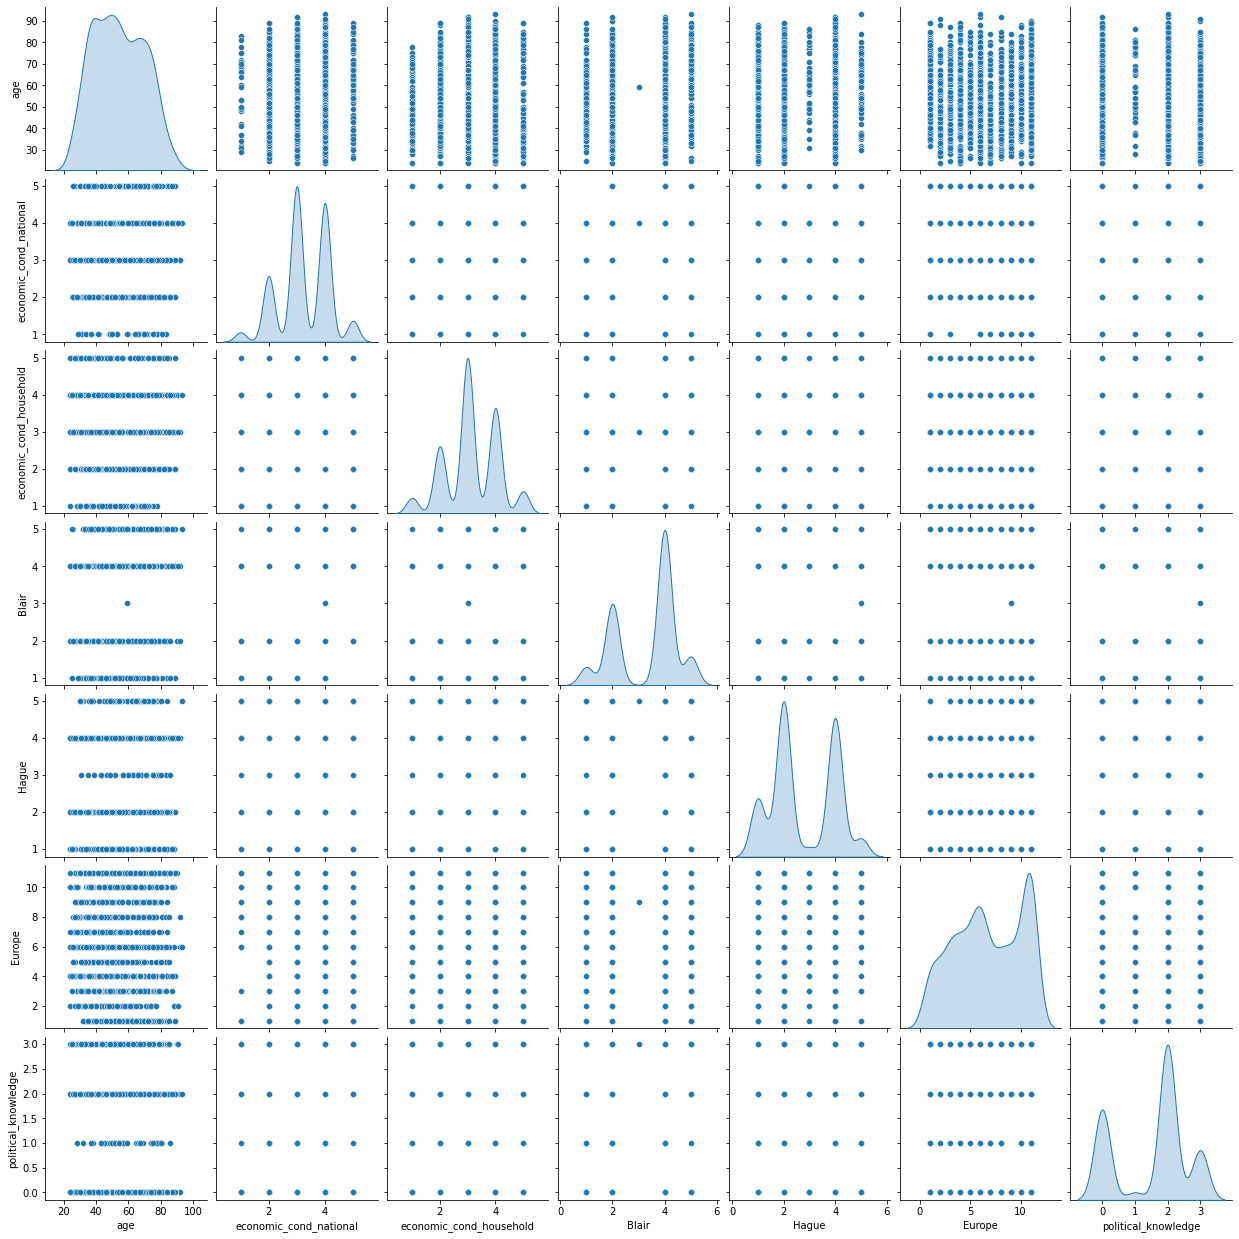

In [145]:
sns.pairplot(data, diag_kind="kde");

<AxesSubplot:xlabel='vote', ylabel='count'>

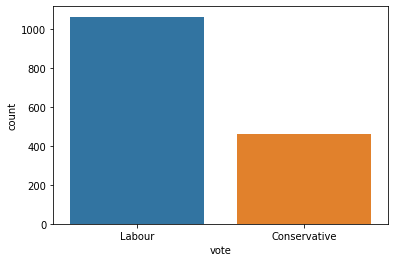

In [146]:
sns.countplot(data=data,x='vote')

<AxesSubplot:xlabel='age', ylabel='Count'>

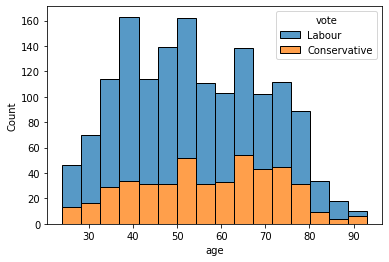

In [147]:
sns.histplot(data=data,x='age',hue='vote',multiple="stack")

C:\Users\ruchi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ruchi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Blair', ylabel='age'>

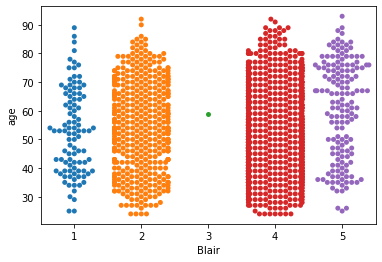

In [148]:
sns.swarmplot(data=data,x='Blair',y='age')

<AxesSubplot:xlabel='Blair', ylabel='age'>

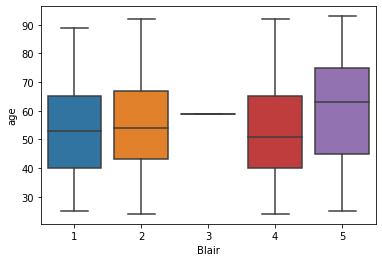

In [149]:
sns.boxplot(data=data,x='Blair',y='age')

C:\Users\ruchi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ruchi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Hague', ylabel='age'>

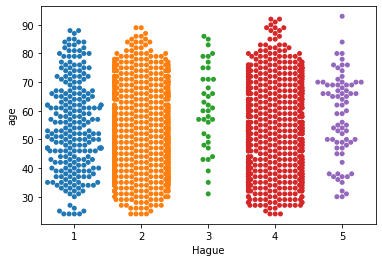

In [150]:
sns.swarmplot(data=data,x='Hague',y='age')

<AxesSubplot:xlabel='Hague', ylabel='age'>

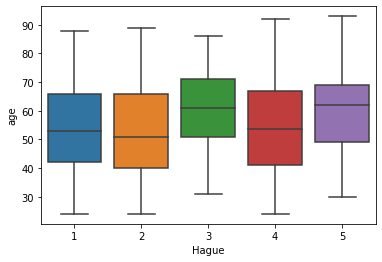

In [151]:
sns.boxplot(data=data,x='Hague',y='age')

<AxesSubplot:xlabel='Blair', ylabel='count'>

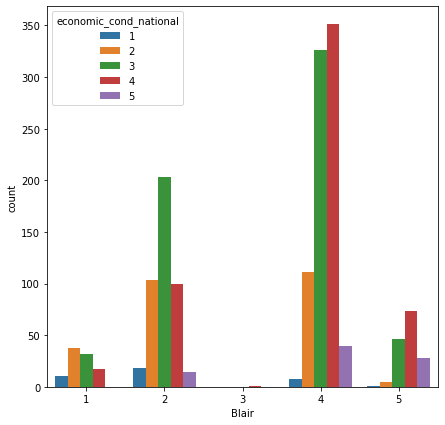

In [152]:
plt.figure(figsize=(7,7))
sns.countplot(data=data,x='Blair',hue='economic_cond_national')

<AxesSubplot:xlabel='Hague', ylabel='count'>

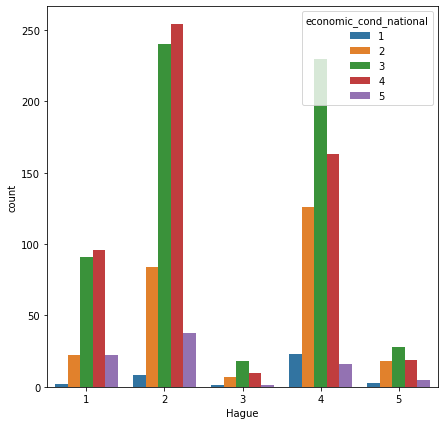

In [153]:
plt.figure(figsize=(7,7))
sns.countplot(data=data,x='Hague',hue='economic_cond_national')

<AxesSubplot:xlabel='Blair', ylabel='count'>

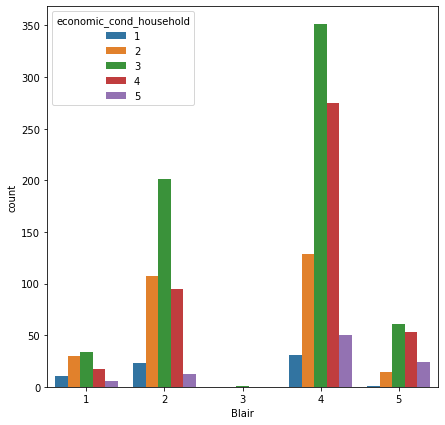

In [154]:
plt.figure(figsize=(7,7))
sns.countplot(data=data,x='Blair',hue='economic_cond_household')

<AxesSubplot:xlabel='Hague', ylabel='count'>

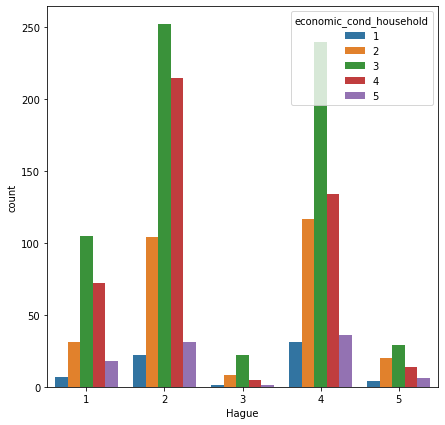

In [155]:
plt.figure(figsize=(7,7))
sns.countplot(data=data,x='Hague',hue='economic_cond_household')

<AxesSubplot:xlabel='Blair', ylabel='count'>

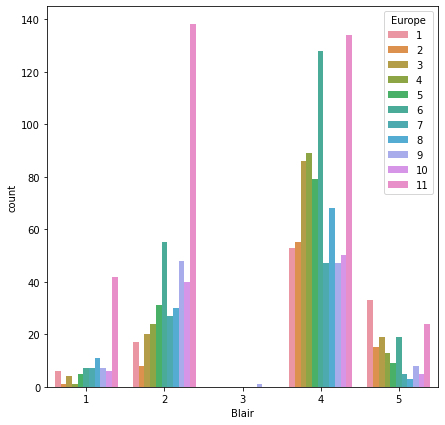

In [156]:
plt.figure(figsize=(7,7))
sns.countplot(data=data,x='Blair',hue='Europe')

<AxesSubplot:xlabel='Hague', ylabel='count'>

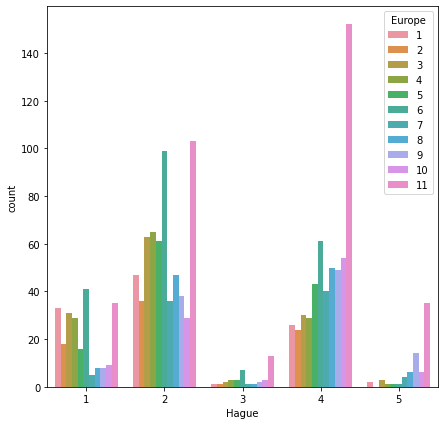

In [157]:
plt.figure(figsize=(7,7))
sns.countplot(data=data,x='Hague',hue='Europe')

In [158]:
data.cov()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge
age,246.842075,0.256981,-0.607619,0.557762,0.669531,3.568550,-0.825301
economic_cond_national,0.256981,0.776107,0.283712,0.338314,-0.216589,-0.608397,-0.022546
economic_cond_household,-0.607619,0.283712,0.864810,0.235192,-0.116689,-0.352299,-0.038091
Blair,0.557762,0.338314,0.235192,1.380212,-0.351648,-1.147341,-0.026621
Hague,0.669531,-0.216589,-0.116689,-0.351648,1.514631,1.166149,-0.040469
Europe,3.568550,-0.608397,-0.352299,-1.147341,1.166149,10.873759,-0.544285
political_knowledge,-0.825301,-0.022546,-0.038091,-0.026621,-0.040469,-0.544285,1.173571


In [159]:
data.corr()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic_cond_national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic_cond_household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political_knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


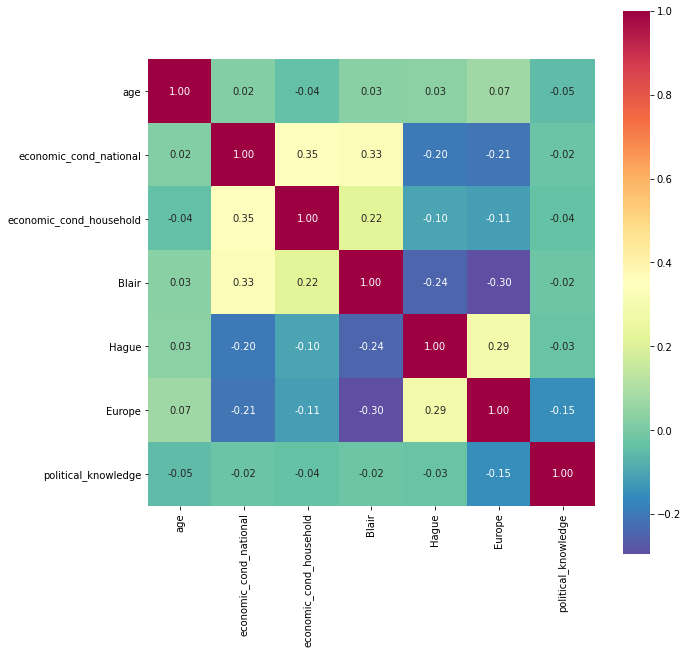

In [160]:
corrmat = data.corr()
plt.figure(figsize=(10,10))
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},  cmap="Spectral_r")
plt.show()

#### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [161]:
data = pd.get_dummies(data, columns=["vote","gender"], drop_first=True)
data.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [162]:
data = data.rename(columns={'vote_Labour':"vote",'gender_male':"gender"})
data.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,vote,gender
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [163]:
from scipy.stats import zscore
from scipy import stats
data['age'] = stats.zscore(data['age'])

In [164]:
data.head()

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,vote,gender
0,-0.711973,3,3,4,1,2,2,1,0
1,-1.157661,4,4,4,4,5,2,1,1
2,-1.221331,4,4,5,2,3,2,1,1
3,-1.921698,4,2,2,1,4,0,1,0
4,-0.839313,2,2,1,1,6,2,1,1


In [166]:
# independent variables
X = data.drop(["vote"], axis=1)
# dependent variable
y = data[["vote"]]

In [167]:
# let's add the intercept to data
X = sm.add_constant(X)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [169]:
print(X_train.head())

      const       age  economic_cond_national  economic_cond_household  Blair  \
1453    1.0  0.497751                       3                        3      2   
275     1.0 -0.329955                       3                        3      2   
1130    1.0  1.261787                       4                        4      4   
1153    1.0  0.179402                       2                        3      4   
1172    1.0 -1.921698                       4                        5      4   

      Hague  Europe  political_knowledge  gender  
1453      2      11                    2       0  
275       2       8                    0       0  
1130      4       7                    0       1  
1153      2       6                    2       0  
1172      4       6                    0       1  


In [170]:
print(X_test.head())

      const       age  economic_cond_national  economic_cond_household  Blair  \
91      1.0 -0.329955                       1                        1      2   
1194    1.0 -1.285001                       3                        3      2   
201     1.0 -0.202616                       2                        2      4   
613     1.0 -1.539680                       2                        3      4   
283     1.0 -0.775643                       3                        3      2   

      Hague  Europe  political_knowledge  gender  
91        4       8                    3       0  
1194      4       9                    2       1  
201       4       4                    2       1  
613       4       7                    3       1  
283       2       9                    0       1  


#### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

In [171]:
model_LR = LogisticRegression(solver='liblinear',max_iter=10000,penalty='l1',tol=0.001,n_jobs=2)
model_LR.fit(X_train, y_train)

C:\Users\ruchi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ruchi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


LogisticRegression(max_iter=10000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=0.001)

In [172]:
ytrain_predict = model_LR.predict(X_train)
ytest_predict = model_LR.predict(X_test)

In [173]:
ytest_predict_prob=model_LR.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.934223,0.065777
1,0.687981,0.312019
2,0.344906,0.655094
3,0.474464,0.525536
4,0.172474,0.827526


In [174]:
# Accuracy - Training Data
model_LR.score(X_train, y_train)

0.8397375820056232

In [175]:
# Accuracy - Training Data
model_LR.score(X_test, y_test)

0.8187772925764192

In [176]:
#print(model_LR.summary()) 

##### Fit the LDA model

In [177]:
model_LDA = LinearDiscriminantAnalysis(solver=)
model_LDA.fit(X_train,y_train)

C:\Users\ruchi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

In [178]:
pred_class_train = model_LDA.predict(X_train)
pred_class_test = model_LDA.predict(X_test)

In [179]:
pred_class_test_prob=model_LDA.predict_proba(X_test)
pd.DataFrame(pred_class_test_prob).head()

,0,1
0,0.952522,0.047478
1,0.741265,0.258735
2,0.328720,0.671280
3,0.486416,0.513584
4,0.139250,0.860750


In [180]:
# Accuracy - Training Data
model_LDA.score(X_train, y_train)

0.8369259606373008

In [181]:
# Accuracy - Training Data
model_LDA.score(X_test, y_test)

0.8187772925764192

#### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

In [182]:
# Call Nearest Neighbour algorithm
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(X_train, y_train)

<ipython-input-182-89b46ee1dff6>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  NNH.fit(X_train, y_train)


KNeighborsClassifier(weights='distance')

In [183]:
pred_train = NNH.predict(X_train)
pred_test = NNH.predict(X_test)

In [184]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
predicted_labels = NNH.predict(X_test)
pd.DataFrame(predicted_labels).head()

,0
0,0
1,0
2,1
3,1
4,1


In [185]:
#pred_test_prob=model_bayes.predict_proba(X_test)

In [186]:
NNH.score(X_train, y_train)

0.9990627928772259

In [187]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases
NNH.score(X_test, y_test)

0.7969432314410481

#### Fit the Bayes Model

In [188]:
from sklearn.naive_bayes import GaussianNB
model_bayes = GaussianNB()
model_bayes.fit(X_train, y_train)
print(model_bayes)

GaussianNB()


C:\Users\ruchi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [189]:
pred_train_class = model_bayes.predict(X_train)
pred_test_class = model_bayes.predict(X_test)

In [190]:
pred_test_prob=model_bayes.predict_proba(X_test)
pd.DataFrame(pred_test_prob).head()

,0,1
0,0.992582,0.007418
1,0.872464,0.127536
2,0.434483,0.565517
3,0.536044,0.463956
4,0.242177,0.757823


In [191]:
# Accuracy - Training Data
model_bayes.score(X_train, y_train)

0.8331771321462043

In [192]:
# Accuracy - Testing Data
model_bayes.score(X_test, y_test)

0.8253275109170306

#### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting

#### Bagging

In [193]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [194]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9990627928772259
0.75764192139738


In [195]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

C:\Users\ruchi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [196]:
pred_train1 = bgcl.predict(X_train)
pred_test1 = bgcl.predict(X_test)

In [271]:
print(bgcl.score(X_train , y_train))

0.9962511715089035


In [197]:
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))


0.8056768558951966


#### AdaBoosting

In [198]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)


C:\Users\ruchi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [199]:
pred_train2 = abcl.predict(X_train)
pred_test2 = abcl.predict(X_test)

In [270]:
print(abcl.score(X_train, y_train))

0.8397375820056232


In [200]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

0.8231441048034934


#### Gradient Boosting

In [201]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

C:\Users\ruchi\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [202]:
pred_train3 = gbcl.predict(X_train)
pred_test3 = gbcl.predict(X_test)

In [272]:
print(gbcl.score(X_train, y_train))

0.8734770384254921


In [203]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))

0.8362445414847162


#### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

### Performance Metrics - Logistic Regression 

#### AUC and ROC curve on Training Data

AUC: 0.890


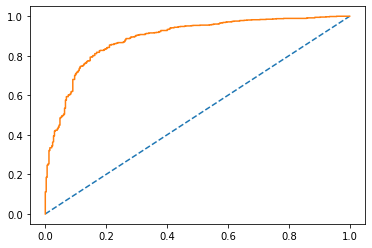

In [205]:
# predict probabilities
probs = model_LR.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label=model_LR.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

##### AUC and ROC for the testing data

AUC: 0.890


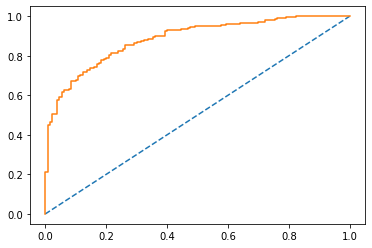

In [206]:
# predict probabilities
probs = model_LR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs,pos_label=model_LR.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion Matrix for training data

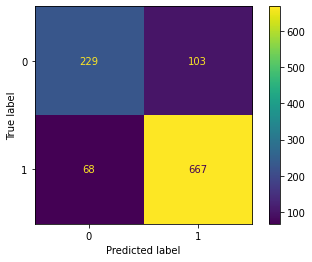

In [207]:
## Confusion matrix on the training data
cm = confusion_matrix(y_train, ytrain_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_LR.classes_)
disp.plot()

#### Confusion matrix for testing data

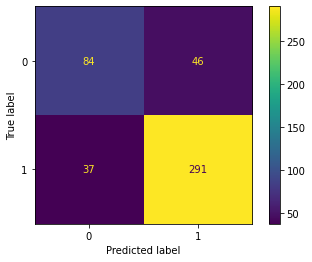

In [208]:
## Confusion matrix on the testing data
cm = confusion_matrix(y_test, ytest_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_LR.classes_)
disp.plot()

#### Classification Report for training data

In [209]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



#### Classification Report for testing data

In [210]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       130
           1       0.86      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



### Performance Metrics - Linear Discriminant Analysis

#### AUC and ROC curve on Training data

AUC: 0.889


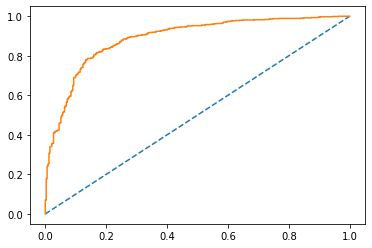

In [211]:
# predict probabilities
probs = model_LDA.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label=model_LDA.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### AUC and ROC curve on Testing data

AUC: 0.889


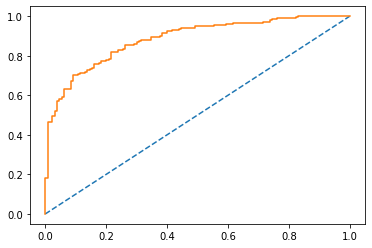

In [212]:
# predict probabilities
probs = model_LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs,pos_label=model_LDA.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion matrix on the training data

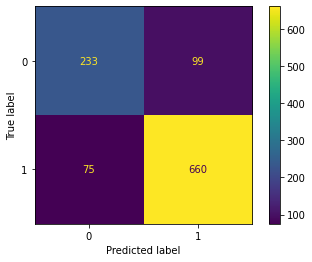

In [213]:
## Confusion matrix on the training data
cm = confusion_matrix(y_train, pred_class_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_LDA.classes_)
disp.plot()

#### Confusion matrix on the testing data

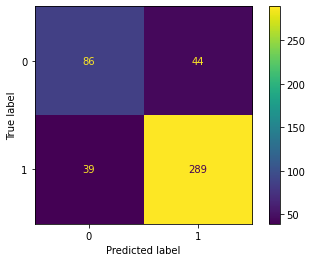

In [214]:
## Confusion matrix on the testing data
cm = confusion_matrix(y_test, pred_class_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_LDA.classes_)
disp.plot()

#### Classification Report for training data

In [215]:
print(classification_report(y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



#### Classification Report for testing data

In [216]:
print(classification_report(y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



### Performance Metrics - KNN 

#### AUC and ROC curve on Training data

AUC: 1.000


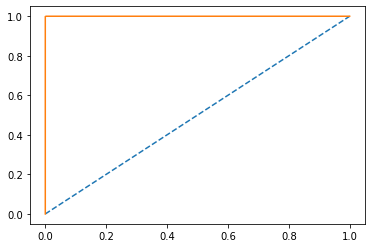

In [217]:
# predict probabilities
probs = NNH.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label=NNH.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### AUC and ROC curve on Testing data

AUC: 1.000


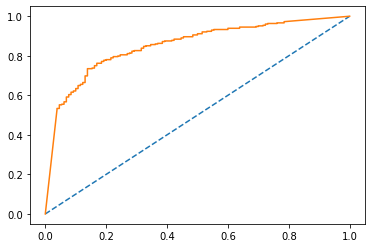

In [218]:
# predict probabilities
probs = NNH.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs,pos_label=NNH.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion matrix on the training data

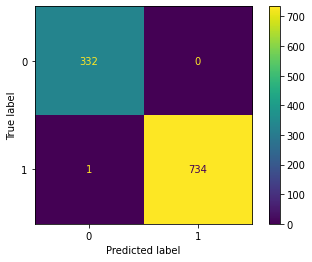

In [219]:
## Confusion matrix on the training data
cm = confusion_matrix(y_train, pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NNH.classes_)
disp.plot()

#### Confusion matrix on the testing  data

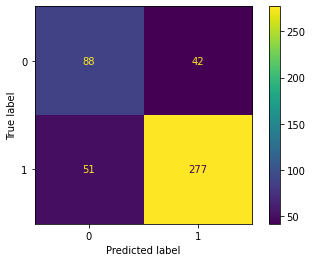

In [220]:
## Confusion matrix on the testing data
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NNH.classes_)
disp.plot()

#### Classification Report for training data

In [221]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



#### Classification Report for testing data

In [222]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.63      0.68      0.65       130
           1       0.87      0.84      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.76      0.76       458
weighted avg       0.80      0.80      0.80       458



### Performance Metrics - Bayes Model

#### AUC and ROC curve on Training data

AUC: 0.886


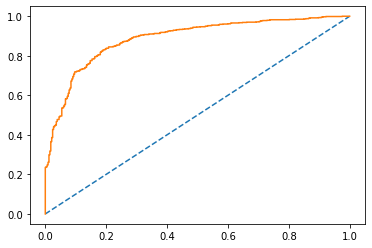

In [223]:
# predict probabilities
probs = model_bayes.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label=model_bayes.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### AUC and ROC curve on Testing data

AUC: 0.886


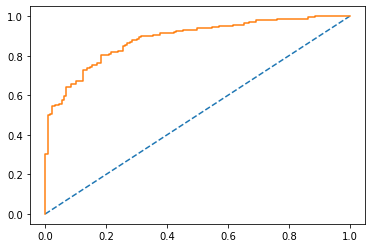

In [224]:
# predict probabilities
probs = model_bayes.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs,pos_label=model_bayes.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion matrix on the training data

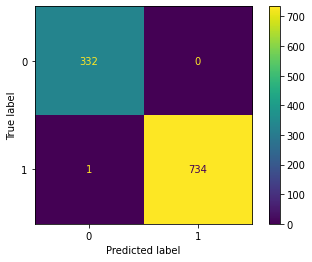

In [225]:
## Confusion matrix on the training data
cm = confusion_matrix(y_train, pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_bayes.classes_)
disp.plot()

#### Confusion matrix on the testing data

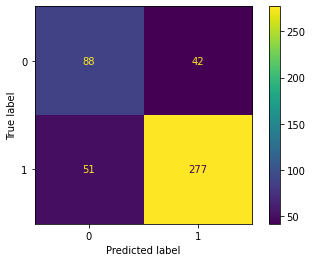

In [226]:
## Confusion matrix on the testing data
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_bayes.classes_)
disp.plot()

#### Classification Report for training data

In [227]:
print(classification_report(y_train, pred_train_class))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



#### Classification Report for testing data

In [228]:
print(classification_report(y_test, pred_test_class))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



### Performance Metrics - Bagging

 #### AUC and ROC curve for Training data

AUC: 1.000


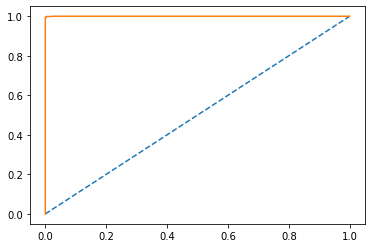

In [229]:
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label=bgcl.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

 #### AUC and ROC curve for testing data

AUC: 1.000


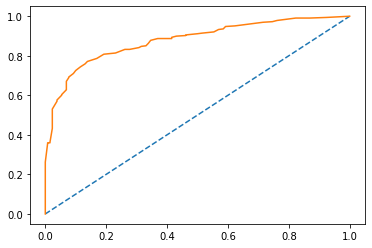

In [230]:
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs,pos_label=bgcl.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion matrix on the training data

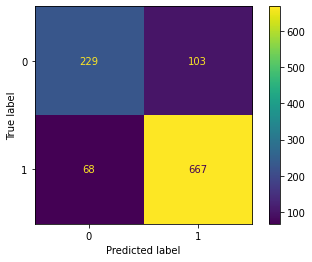

In [231]:
## Confusion matrix on the training data
cm = confusion_matrix(y_train, ytrain_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bgcl.classes_)
disp.plot()

#### Confusion matrix on the testing data

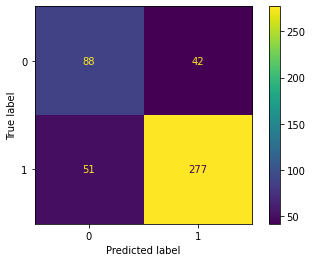

In [232]:
## Confusion matrix on the testing data
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bgcl.classes_)
disp.plot()

#### Classification Report for training data

In [233]:
print(classification_report(y_train, pred_train1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       0.99      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



#### Classification Report for testing data

In [234]:
print(classification_report(y_test, pred_test1))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       130
           1       0.87      0.86      0.86       328

    accuracy                           0.81       458
   macro avg       0.76      0.76      0.76       458
weighted avg       0.81      0.81      0.81       458



#### Performance Metrics - AdaBoosting 

 #### AUC and ROC curve for Training data

AUC: 0.896


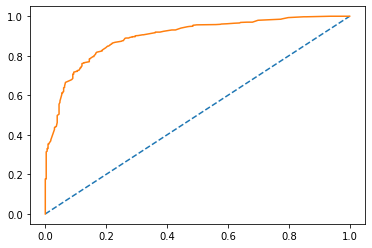

In [235]:
# predict probabilities
probs = abcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label=abcl.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

 #### AUC and ROC curve for testing data

AUC: 0.896


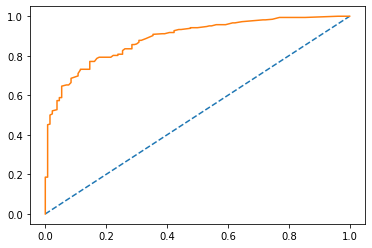

In [236]:
# predict probabilities
probs = abcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs,pos_label=abcl.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion matrix on the training data

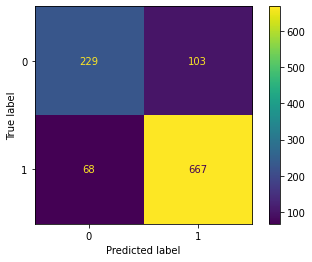

In [237]:
## Confusion matrix on the training data
cm = confusion_matrix(y_train, ytrain_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=abcl.classes_)
disp.plot()

#### Confusion matrix on the testing data

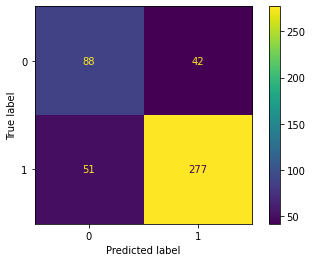

In [238]:
## Confusion matrix on the testing data
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=abcl.classes_)
disp.plot()

#### Classification Report for training data

In [239]:
print(classification_report(y_train, pred_train2))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



#### Classification Report for testing data

In [240]:
print(classification_report(y_test, pred_test2))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



#### Performance Metrics - Gradient Boosting

#### AUC and ROC curve for training data

AUC: 0.936


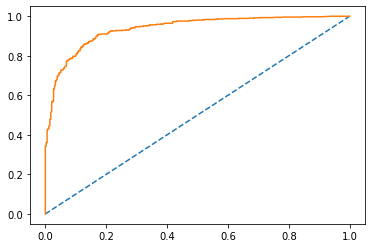

In [241]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label=gbcl.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### AUC and ROC curve for testing data

AUC: 0.936


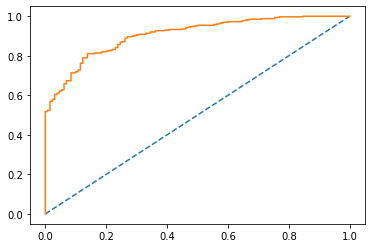

In [242]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs,pos_label=gbcl.classes_[1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion matrix on the training data

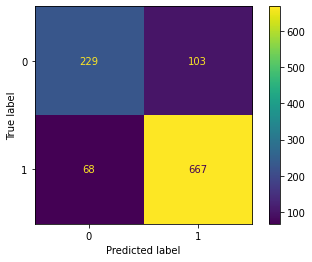

In [243]:
## Confusion matrix on the training data
cm = confusion_matrix(y_train, ytrain_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbcl.classes_)
disp.plot()

#### Confusion matrix on the testing data

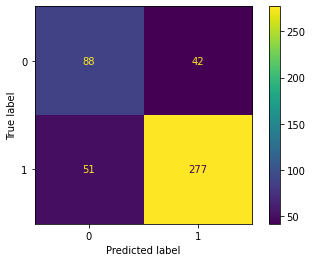

In [244]:
## Confusion matrix on the testing data
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbcl.classes_)
disp.plot()

#### Classification Report for training data

In [245]:
print(classification_report(y_train, pred_train3))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       332
           1       0.89      0.93      0.91       735

    accuracy                           0.87      1067
   macro avg       0.86      0.84      0.85      1067
weighted avg       0.87      0.87      0.87      1067



#### Classification Report for testing data

In [246]:
print(classification_report(y_test, pred_test2))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458

